# Analysis on Chicago Crimes

In [2]:
from google.cloud import bigquery
from google.cloud.bigquery import Dataset
from google.cloud import storage
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import Colormap
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats 
import calendar


## DataFrame Creation 

In [3]:
df1 = pd.read_csv("chicago_crime2012-2014.csv")

C:\Users\rmanuja\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1.shape

(918047, 23)

In [5]:
df2 = pd.read_csv("chicago_crime2015-2017.csv")

In [6]:
df2.shape

(800180, 23)

In [7]:
df = pd.concat([df1, df2], axis=0, sort=False)

In [8]:
df.shape

(1718227, 23)

In [9]:
#df.to_csv('ChicagoCrime.csv', sep=',')

## Data Inspection 

In [10]:
df.head()

,Unnamed: 0,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,0,20399,HV275470,2012-05-07 14:30:00+00:00,009XX E 104TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,...,9.0,50.0,01A,1184238.0,1836191.0,2012,2015-08-17 15:03:40+00:00,41.705678,-87.600944,"(41.705677782, -87.600944364)"
1,1,20506,HV368909,2012-07-06 02:03:00+00:00,106XX S LANGLEY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,9.0,50.0,01A,1182795.0,1834645.0,2012,2015-08-17 15:03:40+00:00,41.701469,-87.606276,"(41.701468915, -87.606276251)"
2,2,21081,HW448778,2013-09-12 14:59:00+00:00,001XX W 104TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,34.0,49.0,01A,1177286.0,1835665.0,2013,2015-08-17 15:03:40+00:00,41.704394,-87.626418,"(41.704393792, -87.626417643)"
3,3,20900,HW295447,2013-05-29 15:11:00+00:00,000XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,34.0,49.0,01A,1177693.0,1834013.0,2013,2015-08-17 15:03:40+00:00,41.699851,-87.624977,"(41.699851294, -87.624977038)"
4,4,20294,HV178038,2012-02-29 18:51:00+00:00,005XX E 104TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,...,9.0,49.0,01A,1181956.0,1835794.0,2012,2015-08-17 15:03:40+00:00,41.704641,-87.609313,"(41.704641317, -87.609312999)"


In [11]:
df.tail()

,Unnamed: 0,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
800175,800175,11181504,JA554229,2017-12-18 16:35:00+00:00,025XX W 21ST ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,...,28.0,31.0,26,1159735.0,1889988.0,2017,2018-05-04 15:51:04+00:00,41.853841,-87.689197,"(41.853841135, -87.689196863)"
800176,800176,11074465,JA414973,2017-09-01 16:09:00+00:00,028XX W CERMAK RD,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,...,12.0,30.0,26,1157688.0,1889261.0,2017,2018-02-10 15:50:01+00:00,41.851888,-87.696730,"(41.85188806, -87.696729928)"
800177,800177,10542065,HZ287409,2016-05-31 12:34:00+00:00,021XX S FAIRFIELD AVE,502R,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,ALLEY,False,...,28.0,30.0,26,1158364.0,1889559.0,2016,2018-02-10 15:50:01+00:00,41.852692,-87.694241,"(41.852692025, -87.694240682)"
800178,800178,11177549,JA549082,2017-12-14 14:28:00+00:00,021XX S WASHTENAW AVE,5110,OTHER OFFENSE,GUN OFFENDER: DUTY TO REGISTER,APARTMENT,True,...,28.0,30.0,26,1158691.0,1889739.0,2017,2018-05-04 15:51:04+00:00,41.853179,-87.693036,"(41.853179279, -87.69303556)"
800179,800179,10489145,HZ229917,2016-04-17 15:03:00+00:00,027XX W 15TH PL,5131,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,HIGHWAY/EXPRESSWAY,False,...,28.0,29.0,26,1158277.0,1892276.0,2016,2018-02-10 15:50:01+00:00,41.860150,-87.694486,"(41.860149538, -87.694485803)"


In [12]:
df.columns

Index(['Unnamed: 0', 'unique_key', 'case_number', 'date', 'block', 'iucr',
       'primary_type', 'description', 'location_description', 'arrest',
       'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code',
       'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude',
       'longitude', 'location'],
      dtype='object')

In [13]:
df.shape

(1718227, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718227 entries, 0 to 800179
Data columns (total 23 columns):
Unnamed: 0              int64
unique_key              int64
case_number             object
date                    object
block                   object
iucr                    object
primary_type            object
description             object
location_description    object
arrest                  bool
domestic                bool
beat                    int64
district                float64
ward                    float64
community_area          float64
fbi_code                object
x_coordinate            float64
y_coordinate            float64
year                    int64
updated_on              object
latitude                float64
longitude               float64
location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 291.7+ MB


## Exploratory Data Analysis

### Frequency Count

In [15]:
df.primary_type.value_counts(dropna = False)

THEFT                                391787
BATTERY                              311006
CRIMINAL DAMAGE                      183238
NARCOTICS                            147521
ASSAULT                              109849
OTHER OFFENSE                        104474
DECEPTIVE PRACTICE                    96163
BURGLARY                              95776
MOTOR VEHICLE THEFT                   71762
ROBBERY                               68579
CRIMINAL TRESPASS                     43412
WEAPONS VIOLATION                     21765
PUBLIC PEACE VIOLATION                14572
OFFENSE INVOLVING CHILDREN            13798
CRIM SEXUAL ASSAULT                    8572
PROSTITUTION                           8338
INTERFERENCE WITH PUBLIC OFFICER       7236
SEX OFFENSE                            6022
HOMICIDE                               3308
ARSON                                  2643
GAMBLING                               2403
LIQUOR LAW VIOLATION                   2145
KIDNAPPING                      

In [16]:
df.primary_type.value_counts(dropna = False)

THEFT                                391787
BATTERY                              311006
CRIMINAL DAMAGE                      183238
NARCOTICS                            147521
ASSAULT                              109849
OTHER OFFENSE                        104474
DECEPTIVE PRACTICE                    96163
BURGLARY                              95776
MOTOR VEHICLE THEFT                   71762
ROBBERY                               68579
CRIMINAL TRESPASS                     43412
WEAPONS VIOLATION                     21765
PUBLIC PEACE VIOLATION                14572
OFFENSE INVOLVING CHILDREN            13798
CRIM SEXUAL ASSAULT                    8572
PROSTITUTION                           8338
INTERFERENCE WITH PUBLIC OFFICER       7236
SEX OFFENSE                            6022
HOMICIDE                               3308
ARSON                                  2643
GAMBLING                               2403
LIQUOR LAW VIOLATION                   2145
KIDNAPPING                      

In [17]:
df.location_description.value_counts(dropna = False)

STREET                            387845
RESIDENCE                         279240
APARTMENT                         217481
SIDEWALK                          181454
OTHER                              67020
PARKING LOT/GARAGE(NON.RESID.)     49673
ALLEY                              36863
RESIDENTIAL YARD (FRONT/BACK)      35810
SMALL RETAIL STORE                 35393
RESTAURANT                         32503
RESIDENCE-GARAGE                   30106
RESIDENCE PORCH/HALLWAY            30007
VEHICLE NON-COMMERCIAL             29888
SCHOOL, PUBLIC, BUILDING           29288
DEPARTMENT STORE                   25085
GROCERY FOOD STORE                 19387
GAS STATION                        19088
PARK PROPERTY                      14337
BAR OR TAVERN                      11744
COMMERCIAL / BUSINESS OFFICE        9311
CTA TRAIN                           8771
CONVENIENCE STORE                   8474
CTA PLATFORM                        8046
HOTEL/MOTEL                         7780
VACANT LOT/LAND 

### Summary Statistics

In [18]:
df.describe()

,Unnamed: 0,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,1.718227e+06,1.718227e+06,1.718227e+06,1.718226e+06,1.718212e+06,1.718197e+06,1.705608e+06,1.705608e+06,1.718227e+06,1.705608e+06,1.705608e+06
mean,4.315776e+05,9.809351e+06,1.149760e+03,1.125326e+01,2.293351e+01,3.732135e+01,1.164519e+06,1.885759e+06,2.014364e+03,4.184212e+01,-8.767180e+01
std,2.514734e+05,9.228494e+05,6.928437e+02,6.917119e+00,1.385918e+01,2.143806e+01,1.699209e+04,3.217323e+04,1.734668e+00,8.851809e-02,6.162044e-02
min,0.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.147780e+05,9.108758e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152671e+06,1.858823e+06,2.013000e+03,4.176804e+01,-8.771481e+01
50%,4.295560e+05,9.819519e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166146e+06,1.891851e+06,2.014000e+03,4.185894e+01,-8.766580e+01
75%,6.443345e+05,1.055298e+07,1.712000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176389e+06,1.908797e+06,2.016000e+03,4.190552e+01,-8.762802e+01
max,9.180460e+05,1.144731e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


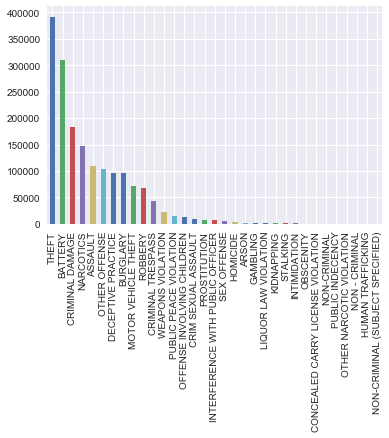

In [26]:
df.primary_type.value_counts(dropna = False).plot('bar')
#crime_total

In [33]:
crime_totals = df[['unique_key','primary_type']].groupby(['primary_type']).count()
crime_totals = crime_totals.reset_index(level=['primary_type'])
crime_totals = crime_totals.rename(columns={"unique_key": "crime_count"})
crime_totals.head()

,primary_type,crime_count
0,ARSON,2643
1,ASSAULT,109849
2,BATTERY,311006
3,BURGLARY,95776
4,CONCEALED CARRY LICENSE VIOLATION,154


In [34]:
crime_location = df[['unique_key','location_description']].groupby(['location_description']).count()
crime_location = crime_location.reset_index(level=['location_description'])
crime_location = crime_location.rename(columns={"unique_key": "crime_count"})
crime_location.head()

,location_description,crime_count
0,ABANDONED BUILDING,4027
1,AIRCRAFT,467
2,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,524
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,382
4,AIRPORT EXTERIOR - NON-SECURE AREA,439
